In [79]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import math
import random
import datetime as dt
import matplotlib.dates as mdates

import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error



Import Data

In [80]:
df = pd.read_csv('C:/Users/yolau/OneDrive/Documents/TA/Kodingan/INCO.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-18,2900.0,2950.0,2880.0,2900.0,2834.681641,8315300.0
1,2017-12-19,2940.0,2940.0,2890.0,2920.0,2854.230957,4371500.0
2,2017-12-20,2900.0,2900.0,2830.0,2850.0,2785.807617,10485500.0
3,2017-12-21,2870.0,2890.0,2840.0,2840.0,2776.032959,5395600.0
4,2017-12-22,2840.0,2850.0,2790.0,2800.0,2736.934082,4185500.0


In [81]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1489,2023-12-08,4310.0,4430.0,4310.0,4360.0,4360.0,21184500.0
1490,2023-12-11,4360.0,4370.0,4190.0,4190.0,4190.0,23613000.0
1491,2023-12-12,4200.0,4250.0,4180.0,4220.0,4220.0,9989200.0
1492,2023-12-13,4220.0,4230.0,4010.0,4020.0,4020.0,25006200.0
1493,2023-12-14,4030.0,4220.0,4030.0,4170.0,4170.0,24832800.0


In [82]:
print("Are there any 'MISSING VALUES / NULL / NaN' in the Dataset?\nAnswer:", df.isnull().sum().values.any())

Are there any 'MISSING VALUES / NULL / NaN' in the Dataset?
Answer: True


In [83]:
# Menghitung jumlah nilai yang hilang per kolom
missing_values_count = df.isna().sum()

# Menampilkan jumlah nilai yang hilang
print(missing_values_count)

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64


In [84]:
df = df.dropna()

In [85]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-18,2900.0,2950.0,2880.0,2900.0,2834.681641,8315300.0
1,2017-12-19,2940.0,2940.0,2890.0,2920.0,2854.230957,4371500.0
2,2017-12-20,2900.0,2900.0,2830.0,2850.0,2785.807617,10485500.0
3,2017-12-21,2870.0,2890.0,2840.0,2840.0,2776.032959,5395600.0
4,2017-12-22,2840.0,2850.0,2790.0,2800.0,2736.934082,4185500.0
...,...,...,...,...,...,...,...
1489,2023-12-08,4310.0,4430.0,4310.0,4360.0,4360.000000,21184500.0
1490,2023-12-11,4360.0,4370.0,4190.0,4190.0,4190.000000,23613000.0
1491,2023-12-12,4200.0,4250.0,4180.0,4220.0,4220.000000,9989200.0
1492,2023-12-13,4220.0,4230.0,4010.0,4020.0,4020.000000,25006200.0


In [86]:
specific_df = df[['Date', 'Close', 'Open', 'High', 'Low']]

In [87]:
specific_df

,Date,Close,Open,High,Low
0,2017-12-18,2900.0,2900.0,2950.0,2880.0
1,2017-12-19,2920.0,2940.0,2940.0,2890.0
2,2017-12-20,2850.0,2900.0,2900.0,2830.0
3,2017-12-21,2840.0,2870.0,2890.0,2840.0
4,2017-12-22,2800.0,2840.0,2850.0,2790.0
...,...,...,...,...,...
1489,2023-12-08,4360.0,4310.0,4430.0,4310.0
1490,2023-12-11,4190.0,4360.0,4370.0,4190.0
1491,2023-12-12,4220.0,4200.0,4250.0,4180.0
1492,2023-12-13,4020.0,4220.0,4230.0,4010.0


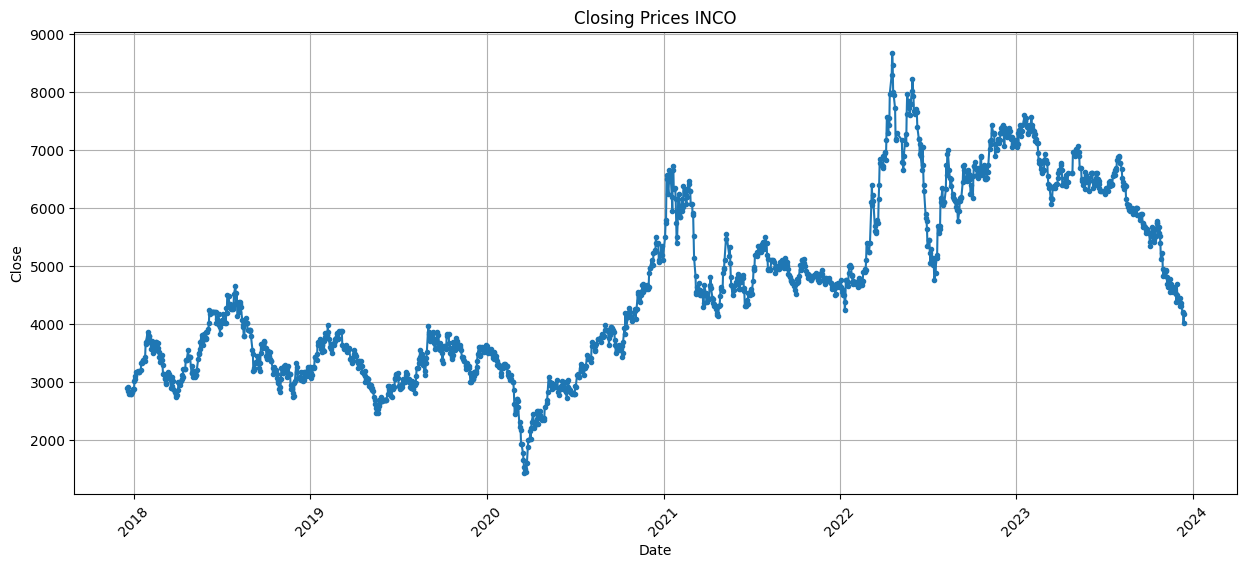

In [88]:
specific_df['Date'] = pd.to_datetime(specific_df['Date'])

plt.figure(figsize=(15,6))
plt.plot(specific_df['Date'], specific_df['Close'], marker='.')
plt.title('Closing Prices INCO')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

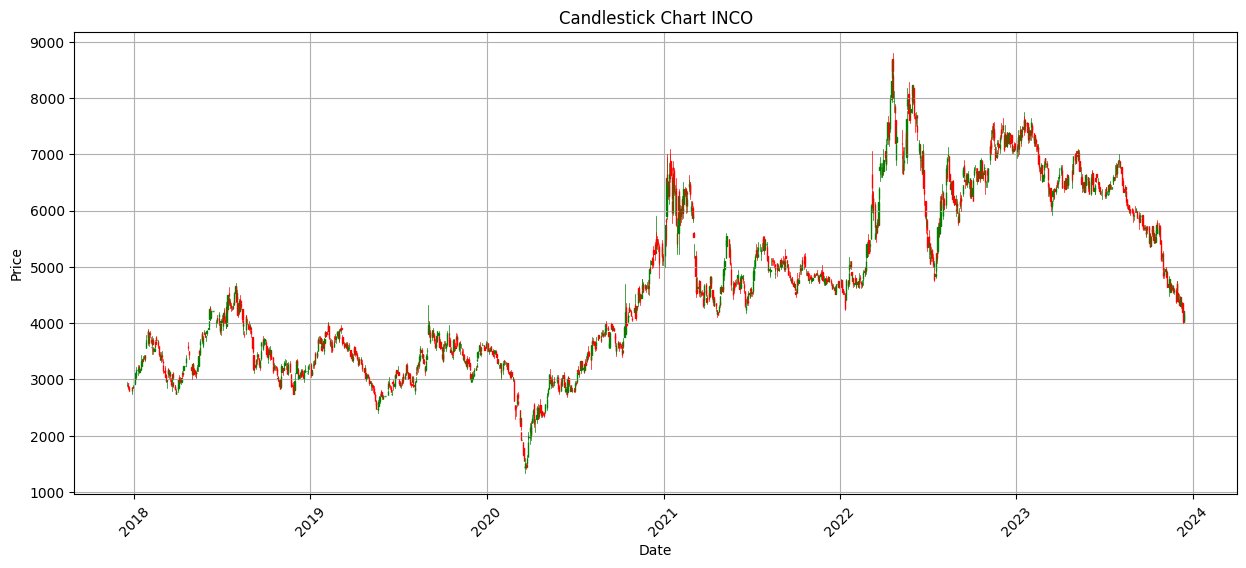

In [89]:
matplotlib_date = mdates.date2num(specific_df['Date'])

ohlc = np.vstack((matplotlib_date, specific_df['Open'], specific_df['High'], specific_df['Low'], specific_df['Close'])).T

plt.figure(figsize=(15,6))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')
ax.xaxis_date()
plt.title('Candlestick Chart INCO')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

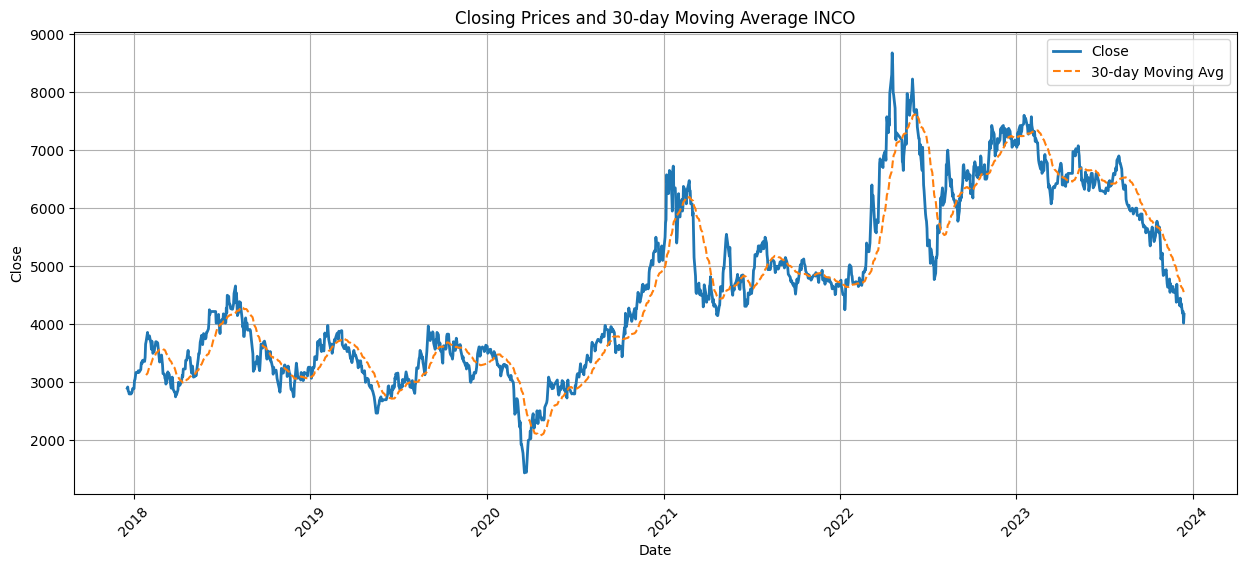

In [90]:
window = 30
plt.figure(figsize=(15,6))
plt.plot(specific_df['Date'], specific_df['Close'], label='Close', linewidth=2)
plt.plot(specific_df['Date'], specific_df['Close'].rolling(window=window).mean(),label=f'{window}-day Moving Avg', linestyle='--')
plt.title(f'Closing Prices and {window}-day Moving Average INCO')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [91]:
specific_df.head()

,Date,Close,Open,High,Low
0,2017-12-18,2900.0,2900.0,2950.0,2880.0
1,2017-12-19,2920.0,2940.0,2940.0,2890.0
2,2017-12-20,2850.0,2900.0,2900.0,2830.0
3,2017-12-21,2840.0,2870.0,2890.0,2840.0
4,2017-12-22,2800.0,2840.0,2850.0,2790.0


In [92]:
new_df = specific_df.reset_index()['Close']

In [93]:
new_df

0       2900.0
1       2920.0
2       2850.0
3       2840.0
4       2800.0
         ...  
1488    4360.0
1489    4190.0
1490    4220.0
1491    4020.0
1492    4170.0
Name: Close, Length: 1493, dtype: float64

In [94]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(np.array(new_df).reshape(-1,1))

Partisi Data

In [95]:
train_size = int(len(scaled_data)*0.8) #80% for training
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [96]:
n_past = 60

X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

In [97]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(1134, 60)
(1134,)


Testing set size:-
(239, 60)
(239,)


(None, None)

In [98]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [99]:
Layer = 3

In [100]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.9))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.9))

model.add(LSTM(units=50))
model.add(Dropout(0.9))

model.add(Dense(units=1))

In [101]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_18 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_19 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_19 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_20 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_20 (Dropout)        (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [102]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [103]:
checkpoints = ModelCheckpoint(filepath= 'inco.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/100
36/36 [==============================] - 24s 192ms/step - loss: 0.0840 - val_loss: 0.0419
Epoch 2/100
36/36 [==============================] - 3s 74ms/step - loss: 0.0429 - val_loss: 0.0082
Epoch 3/100
36/36 [==============================] - 2s 63ms/step - loss: 0.0362 - val_loss: 0.0088
Epoch 4/100
36/36 [==============================] - 2s 64ms/step - loss: 0.0296 - val_loss: 0.0138
Epoch 5/100
36/36 [==============================] - 2s 67ms/step - loss: 0.0254 - val_loss: 0.0203
Epoch 6/100
36/36 [==============================] - 2s 63ms/step - loss: 0.0269 - val_loss: 0.0130
Epoch 7/100
36/36 [==============================] - 2s 65ms/step - loss: 0.0214 - val_loss: 0.0169
Epoch 8/100
36/36 [==============================] - 2s 68ms/step - loss: 0.0211 - val_loss: 0.0241
Epoch 9/100
36/36 [==============================] - 2s 65ms/step - loss: 0.0181 - val_loss: 0.0087
Epoch 10/100
36/36 [==============================] - 2s 67ms/step - loss: 0.0165 - val_loss: 0.00

In [104]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 24ms/step


In [105]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [106]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.052588405302044346
0.04277091904454712


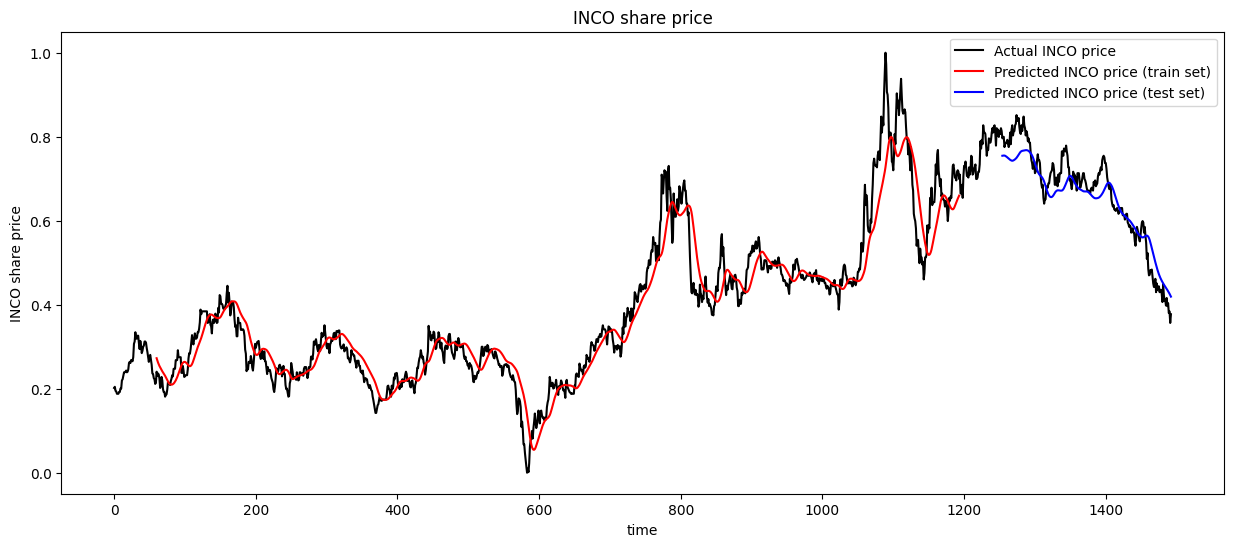

In [107]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual INCO price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted INCO price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted INCO price (test set)")

plt.title(f"INCO share price")
plt.xlabel("time")
plt.ylabel(f"INCO share price")
plt.legend()
plt.show()

In [108]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 214ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 4473.46337890625
Day 2: Predicted Price = 4448.81201171875
Day 3: Predicted Price = 4428.94482421875
Day 4: Predicted Price = 4414.41015625
Day 5: Predicted Price = 4404.75634765625
Day 6: Predicted Price = 4399.11279296875
Day 7: Predicted Price = 4396.5224609375
Day 8: Predicted Price = 4396.11474609375
Day 9: Predicted Price = 4397.17431640625
Day 10: Predicted Price = 4399.16162109375
Day 11: Predicted Price = 4401.68798828125
Day 12: Predicted Price = 4404.49560546875
Day 13: Predicted Price = 4407.42333984375
Day 14: Predicted Price = 4410.375
Day 15: Predicted Price = 4413.30029296875
Day 16: Predicted Price = 4416.17724609375
Day 17: Predicted Price = 4419.0029296875
Day 18: Predicted Price = 4421.78076171875
Day 19: Predicted Price = 4424.52001953125
Day 20: Predicted Price = 4427.228515625
Day 21: Predicted Price = 4429.9140625
Day 22: Predicted Price = 4432.5805664

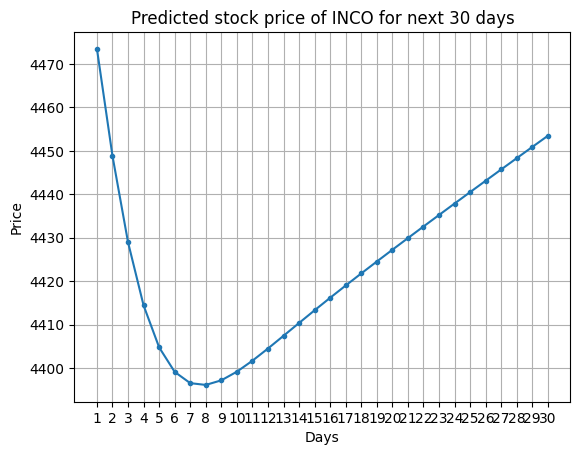

In [109]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of INCO for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [110]:
# Evaluasi model
val_loss = model.evaluate(X_test, y_test)

print(f'Validation Loss: {val_loss}')

# Jika Anda memerlukan nilai MSE juga
val_mse = val_loss  # karena val_loss langsung berisi MSE
print(f'Validation MSE Loss: {val_mse}')



8/8 [==============================] - 0s 23ms/step - loss: 0.0018
Validation Loss: 0.0018293516477569938
Validation MSE Loss: 0.0018293516477569938


In [111]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.052588405302044346
Testing RMSE: 0.04277091904454712


Layer = 4

In [112]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.9))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.9))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.9))

model.add(LSTM(units=50))
model.add(Dropout(0.9))

model.add(Dense(units=1))

In [113]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_21 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_22 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_22 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_23 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_23 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_24 (LSTM)              (None, 50)               

In [114]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [115]:
checkpoints = ModelCheckpoint(filepath= 'inco.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/100
36/36 [==============================] - 41s 190ms/step - loss: 0.0966 - val_loss: 0.0713
Epoch 2/100
36/36 [==============================] - 3s 86ms/step - loss: 0.0471 - val_loss: 0.0371
Epoch 3/100
36/36 [==============================] - 3s 96ms/step - loss: 0.0374 - val_loss: 0.0377
Epoch 4/100
36/36 [==============================] - 3s 87ms/step - loss: 0.0347 - val_loss: 0.0116
Epoch 5/100
36/36 [==============================] - 3s 83ms/step - loss: 0.0306 - val_loss: 0.0339
Epoch 6/100
36/36 [==============================] - 3s 82ms/step - loss: 0.0281 - val_loss: 0.0271
Epoch 7/100
36/36 [==============================] - 3s 89ms/step - loss: 0.0270 - val_loss: 0.0208
Epoch 8/100
36/36 [==============================] - 3s 95ms/step - loss: 0.0228 - val_loss: 0.0203
Epoch 9/100
36/36 [==============================] - 3s 83ms/step - loss: 0.0219 - val_loss: 0.0185
Epoch 10/100
36/36 [==============================] - 3s 92ms/step - loss: 0.0200 - val_loss: 0.00

In [116]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 27ms/step


In [117]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [118]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

train_rmse = np.sqrt(mean_squared_error(y_train,train_predict))


0.06354063587269669
0.0492819243723231


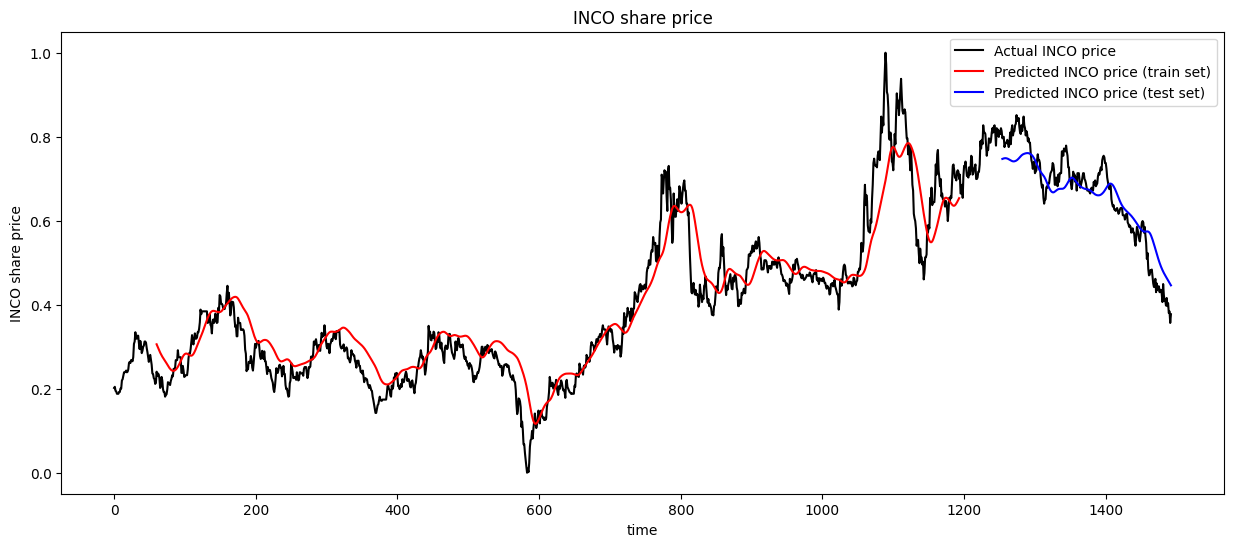

In [119]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual INCO price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted INCO price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted INCO price (test set)")

plt.title(f"INCO share price")
plt.xlabel("time")
plt.ylabel(f"INCO share price")
plt.legend()
plt.show()

In [120]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 51ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 4667.7958984375
Day 2: Predicted Price = 4645.09326171875
Day 3: Predicted Price = 4624.29296875
Day 4: Predicted Price = 4606.89208984375
Day 5: Predicted Price = 4593.83056640625
Day 6: Predicted Price = 4585.4453125
Day 7: Predicted Price = 4581.5322265625
Day 8: Predicted Price = 4581.5712890625
Day 9: Predicted Price = 4584.8623046875
Day 10: Predicted Price = 4590.61328125
Day 11: Predicted Price = 4598.109375
Day 12: Predicted Price = 4606.69140625
Day 13: Predicted Price = 4615.79833984375
Day 14: Predicted Price = 4625.056640625
Day 15: Predicted Price = 4634.24072265625
Day 16: Predicted Price = 4643.197265625
Day 17: Predicted Price = 4651.8486328125
Day 18: Predicted Price = 4660.16943359375
Day 19: Predicted Price = 4668.154296875
Day 20: Predicted Price = 4675.84130859375
Day 21: Predicted Price = 4683.28515625
Day 22: Predicted Price = 4690.54833984375
Day 23: P

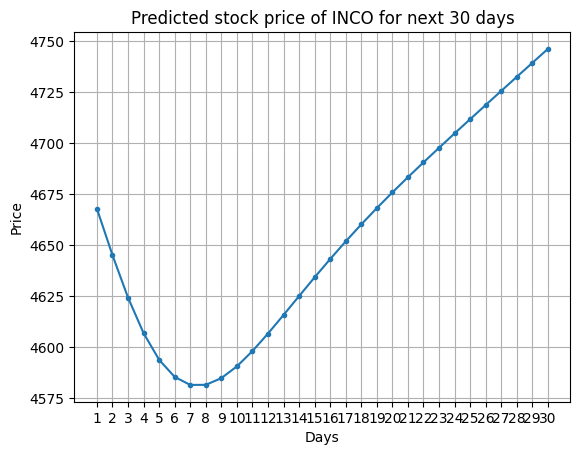

In [121]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of INCO for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [122]:
# Evaluasi model
val_loss = model.evaluate(X_test, y_test)

print(f'Validation Loss: {val_loss}')

# Jika Anda memerlukan nilai MSE juga
val_mse = val_loss  # karena val_loss langsung berisi MSE
print(f'Validation MSE Loss: {val_mse}')



8/8 [==============================] - 0s 30ms/step - loss: 0.0024
Validation Loss: 0.002428708365187049
Validation MSE Loss: 0.002428708365187049


In [123]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.06354063587269669
Testing RMSE: 0.0492819243723231


Layer = 5

In [124]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.9))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.9))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.9))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.9))

model.add(LSTM(units=50))
model.add(Dropout(0.9))

model.add(Dense(units=1))

In [125]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_25 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_26 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_26 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_27 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_27 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_28 (LSTM)              (None, 60, 50)           

In [126]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [127]:
checkpoints = ModelCheckpoint(filepath= 'inco.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/100
36/36 [==============================] - 91s 526ms/step - loss: 0.0866 - val_loss: 0.0707
Epoch 2/100
36/36 [==============================] - 5s 127ms/step - loss: 0.0470 - val_loss: 0.0256
Epoch 3/100
36/36 [==============================] - 5s 124ms/step - loss: 0.0359 - val_loss: 0.0295
Epoch 4/100
36/36 [==============================] - 4s 118ms/step - loss: 0.0356 - val_loss: 0.0193
Epoch 5/100
36/36 [==============================] - 4s 111ms/step - loss: 0.0301 - val_loss: 0.0135
Epoch 6/100
36/36 [==============================] - 4s 110ms/step - loss: 0.0302 - val_loss: 0.0436
Epoch 7/100
36/36 [==============================] - 4s 106ms/step - loss: 0.0273 - val_loss: 0.0500
Epoch 8/100
36/36 [==============================] - 4s 107ms/step - loss: 0.0245 - val_loss: 0.0135
Epoch 9/100
36/36 [==============================] - 4s 107ms/step - loss: 0.0216 - val_loss: 0.0320
Epoch 10/100
36/36 [==============================] - 4s 101ms/step - loss: 0.0209 - val_l

In [128]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 28ms/step


In [129]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [130]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

train_rmse = np.sqrt(mean_squared_error(y_train,train_predict))


0.06309932317732193
0.05107127653011002


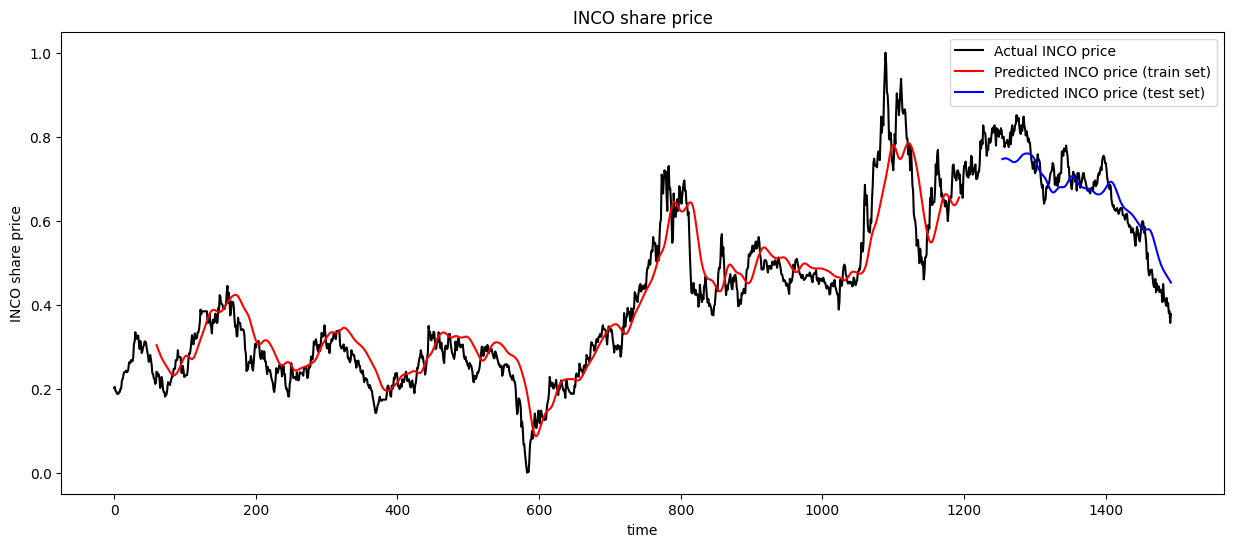

In [131]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual INCO price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted INCO price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted INCO price (test set)")

plt.title(f"INCO share price")
plt.xlabel("time")
plt.ylabel(f"INCO share price")
plt.legend()
plt.show()

In [132]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 40ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 4715.8642578125
Day 2: Predicted Price = 4693.150390625
Day 3: Predicted Price = 4670.95068359375
Day 4: Predicted Price = 4650.89306640625
Day 5: Predicted Price = 4634.55712890625
Day 6: Predicted Price = 4623.107421875
Day 7: Predicted Price = 4617.06494140625
Day 8: Predicted Price = 4616.40234375
Day 9: Predicted Price = 4620.60986328125
Day 10: Predicted Price = 4628.79638671875
Day 11: Predicted Price = 4639.96533203125
Day 12: Predicted Price = 4653.0478515625
Day 13: Predicted Price = 4667.0419921875
Day 14: Predicted Price = 4681.2001953125
Day 15: Predicted Price = 4695.029296875
Day 16: Predicted Price = 4708.193359375
Day 17: Predicted Price = 4720.53173828125
Day 18: Predicted Price = 4732.0185546875
Day 19: Predicted Price = 4742.69384765625
Day 20: Predicted Price = 4752.68994140625
Day 21: Predicted Price = 4762.17333984375
Day 22: Predicted Price = 4771.31835

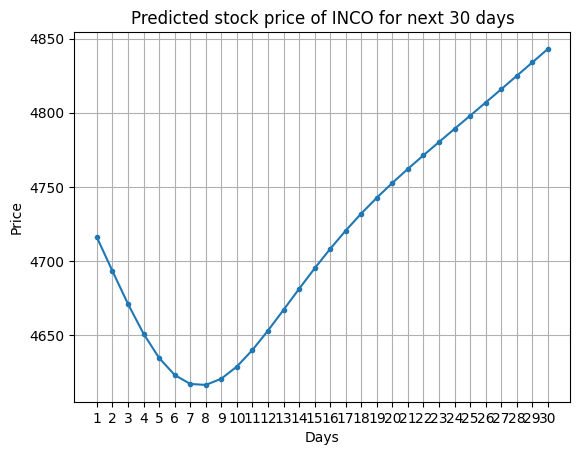

In [133]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of INCO for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [134]:
# Evaluasi model
val_loss = model.evaluate(X_test, y_test)

print(f'Validation Loss: {val_loss}')

# Jika Anda memerlukan nilai MSE juga
val_mse = val_loss  # karena val_loss langsung berisi MSE
print(f'Validation MSE Loss: {val_mse}')



8/8 [==============================] - 0s 31ms/step - loss: 0.0026
Validation Loss: 0.0026082752738147974
Validation MSE Loss: 0.0026082752738147974


In [135]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.06309932317732193
Testing RMSE: 0.05107127653011002


Layer = 6

In [136]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.9))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.9))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.9))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.9))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.9))

model.add(LSTM(units=50))
model.add(Dropout(0.9))

model.add(Dense(units=1))

In [137]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_30 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_31 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_31 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_32 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_32 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_33 (LSTM)              (None, 60, 50)           

 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 111451 (435.36 KB)
Trainable params: 111451 (435.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [138]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [139]:
checkpoints = ModelCheckpoint(filepath= 'inco.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/100
36/36 [==============================] - 24s 219ms/step - loss: 0.0891 - val_loss: 0.0566
Epoch 2/100
36/36 [==============================] - 4s 118ms/step - loss: 0.0521 - val_loss: 0.0614
Epoch 3/100
36/36 [==============================] - 4s 121ms/step - loss: 0.0399 - val_loss: 0.0272
Epoch 4/100
36/36 [==============================] - 4s 118ms/step - loss: 0.0406 - val_loss: 0.0539
Epoch 5/100
36/36 [==============================] - 4s 125ms/step - loss: 0.0319 - val_loss: 0.0173
Epoch 6/100
36/36 [==============================] - 4s 120ms/step - loss: 0.0341 - val_loss: 0.0198
Epoch 7/100
36/36 [==============================] - 4s 121ms/step - loss: 0.0265 - val_loss: 0.0165
Epoch 8/100
36/36 [==============================] - 4s 123ms/step - loss: 0.0277 - val_loss: 0.0188
Epoch 9/100
36/36 [==============================] - 4s 119ms/step - loss: 0.0251 - val_loss: 0.0123
Epoch 10/100
36/36 [==============================] - 4s 122ms/step - loss: 0.0226 - val_l

In [140]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 39ms/step


In [141]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [142]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

train_rmse = np.sqrt(mean_squared_error(y_train,train_predict))


0.06765314083617255
0.054832995543115944


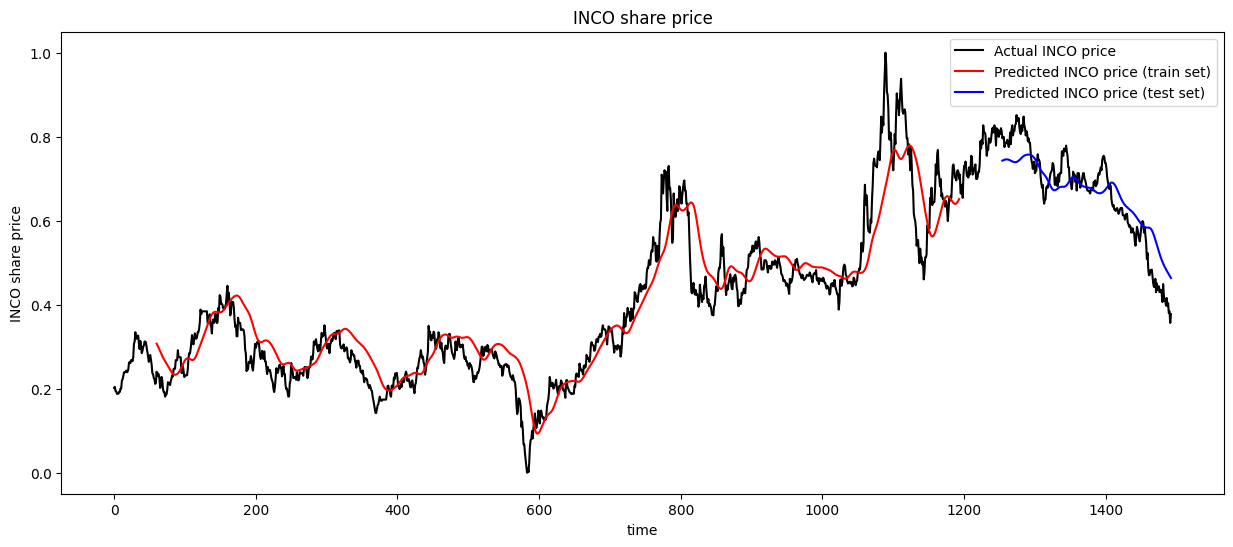

In [143]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual INCO price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted INCO price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted INCO price (test set)")

plt.title(f"INCO share price")
plt.xlabel("time")
plt.ylabel(f"INCO share price")
plt.legend()
plt.show()

In [144]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 67ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 4794.1240234375
Day 2: Predicted Price = 4771.51708984375
Day 3: Predicted Price = 4748.84375
Day 4: Predicted Price = 4727.0478515625
Day 5: Predicted Price = 4707.4169921875
Day 6: Predicted Price = 4691.2451171875
Day 7: Predicted Price = 4679.43896484375
Day 8: Predicted Price = 4672.5869140625
Day 9: Predicted Price = 4670.8310546875
Day 10: Predicted Price = 4673.7587890625
Day 11: Predicted Price = 4680.736328125
Day 12: Predicted Price = 4690.78271484375
Day 13: Predicted Price = 4702.74560546875
Day 14: Predicted Price = 4715.69873046875
Day 15: Predicted Price = 4728.95751953125
Day 16: Predicted Price = 4741.919921875
Day 17: Predicted Price = 4754.17919921875
Day 18: Predicted Price = 4765.5087890625
Day 19: Predicted Price = 4775.7783203125
Day 20: Predicted Price = 4785.05859375
Day 21: Predicted Price = 4793.52685546875
Day 22: Predicted Price = 4801.4287109375


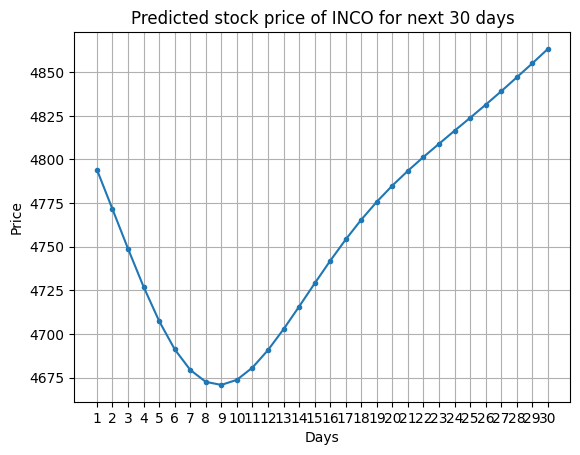

In [145]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of INCO for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [146]:
# Evaluasi model
val_loss = model.evaluate(X_test, y_test)

print(f'Validation Loss: {val_loss}')

# Jika Anda memerlukan nilai MSE juga
val_mse = val_loss  # karena val_loss langsung berisi MSE
print(f'Validation MSE Loss: {val_mse}')



8/8 [==============================] - 0s 42ms/step - loss: 0.0030
Validation Loss: 0.003006657585501671
Validation MSE Loss: 0.003006657585501671


In [147]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.06765314083617255
Testing RMSE: 0.054832995543115944


: 